# Separate all bit planes from 8  bit image and display

### Algorithm:
1. Create a mask of binary bits (eg. 0b10000000) (length depending on the number of bit planes)
2. Do a bit-wise AND operation of each pixel value with the mask to expose only that specific bit plane
3. Save the above newly created pixel values into another temporary image
4. Display the new image
5. Right shift the mask bit-wise by 1 bit, in order to extract the next bit plane
6. Repeat from Step 1 until all the bit planes have been successfully plotted

In [1]:
# Import required libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec

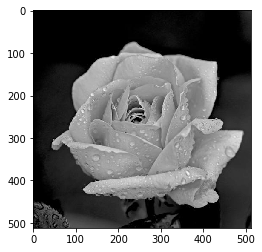

In [2]:
# Read the image in grayscale mode and display the unaltered image
image = cv2.imread('rose.jpg', 0)
plt.imshow(image, cmap='gray')

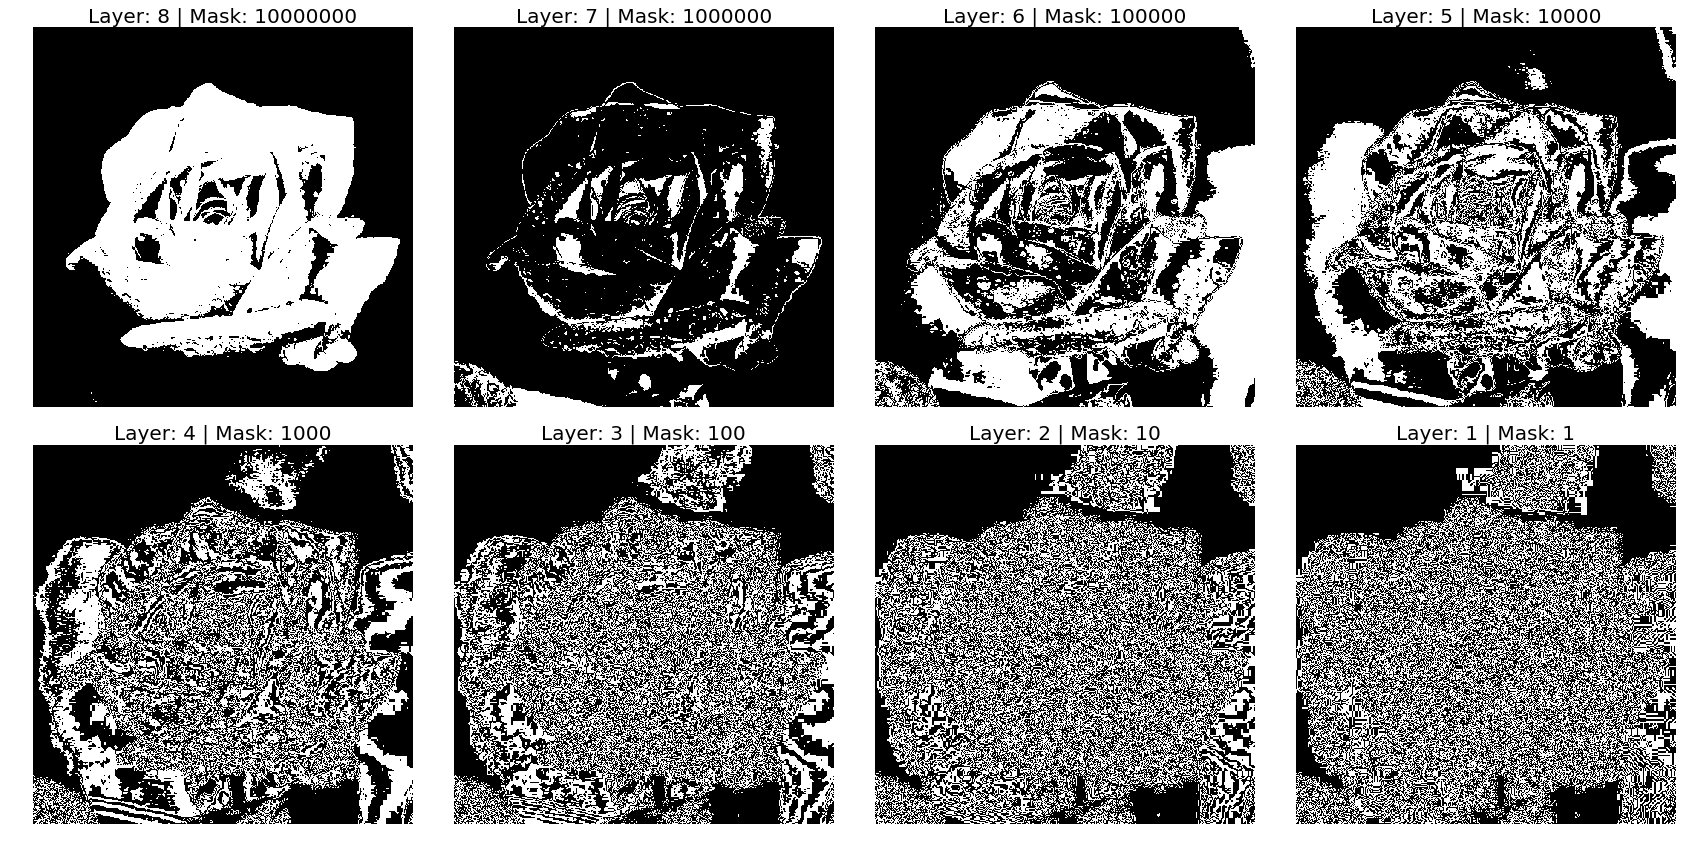

In [3]:
# Create the mask, declare the plotting parameters and extract the bit planes as per the proposed algorithm
mask = 0b10000000
plt.figure(figsize=(30,30))
gs = gridspec.GridSpec(4, 4)
gs.update(wspace=0.025, hspace=0.1)

# For 8 bit planes, the mask is shifted 8 times and bit-wise AND operation is perfomed on each pixel with the mask
for x in range(8):
    temp = np.zeros(image.shape, dtype=np.uint64)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            temp[i][j] = image[i][j] & mask
    
    # Plot the figures in a 4x4 grid from MSB layer to LSB layer (Left to Right, Top to Bottom Format)
    fig = plt.subplot(gs[x])
    plt.imshow(temp, cmap='gray')
    plt.title("Layer: {0} | Mask: {1:b}".format(8-x, mask), fontsize=20)
    plt.axis('off')
    
    # The Mask is right shifted by 1 bit after every iteration to select the next bit-plane
    mask >>= 1